In [63]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
train_df = pd.read_csv('train.csv').drop(columns=['PassengerId','Name'], axis=1)
train_df.info()
train_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
5,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
6,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
7,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,True
8,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True
9,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True


In [31]:
def props(df, col):
    ct = df[col].value_counts(dropna=False).sort_index()
    plt.figure(figsize=(8,8))
    plt.pie(ct, labels=ct.index, autopct='%1.1f%%', startangle=0)
    plt.title(col)
    plt.show

def visualize(df, col1, col2):
    ct = df[col1].value_counts(dropna=False).sort_index()
    grouped_data = df.groupby([col1, col2]).size().unstack(fill_value=0)
    proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)
    fig, ax= plt.subplots(figsize=(20, 12))
    proportions.plot(kind='bar', stacked=True, ax=ax)
    plt.xlabel(col1)
    plt.ylabel('Proportion')
    plt.legend(title=col2, bbox_to_anchor=(1,1))
    plt.show(
        
    )

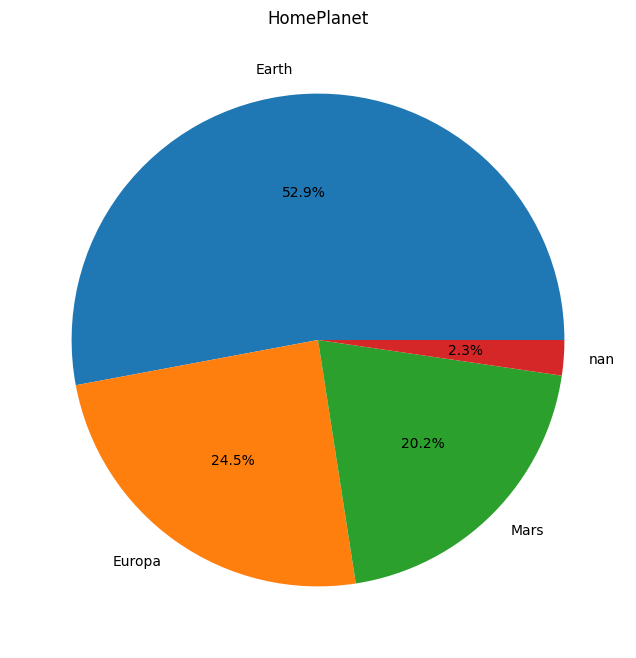

In [32]:
props(train_df, 'HomePlanet')

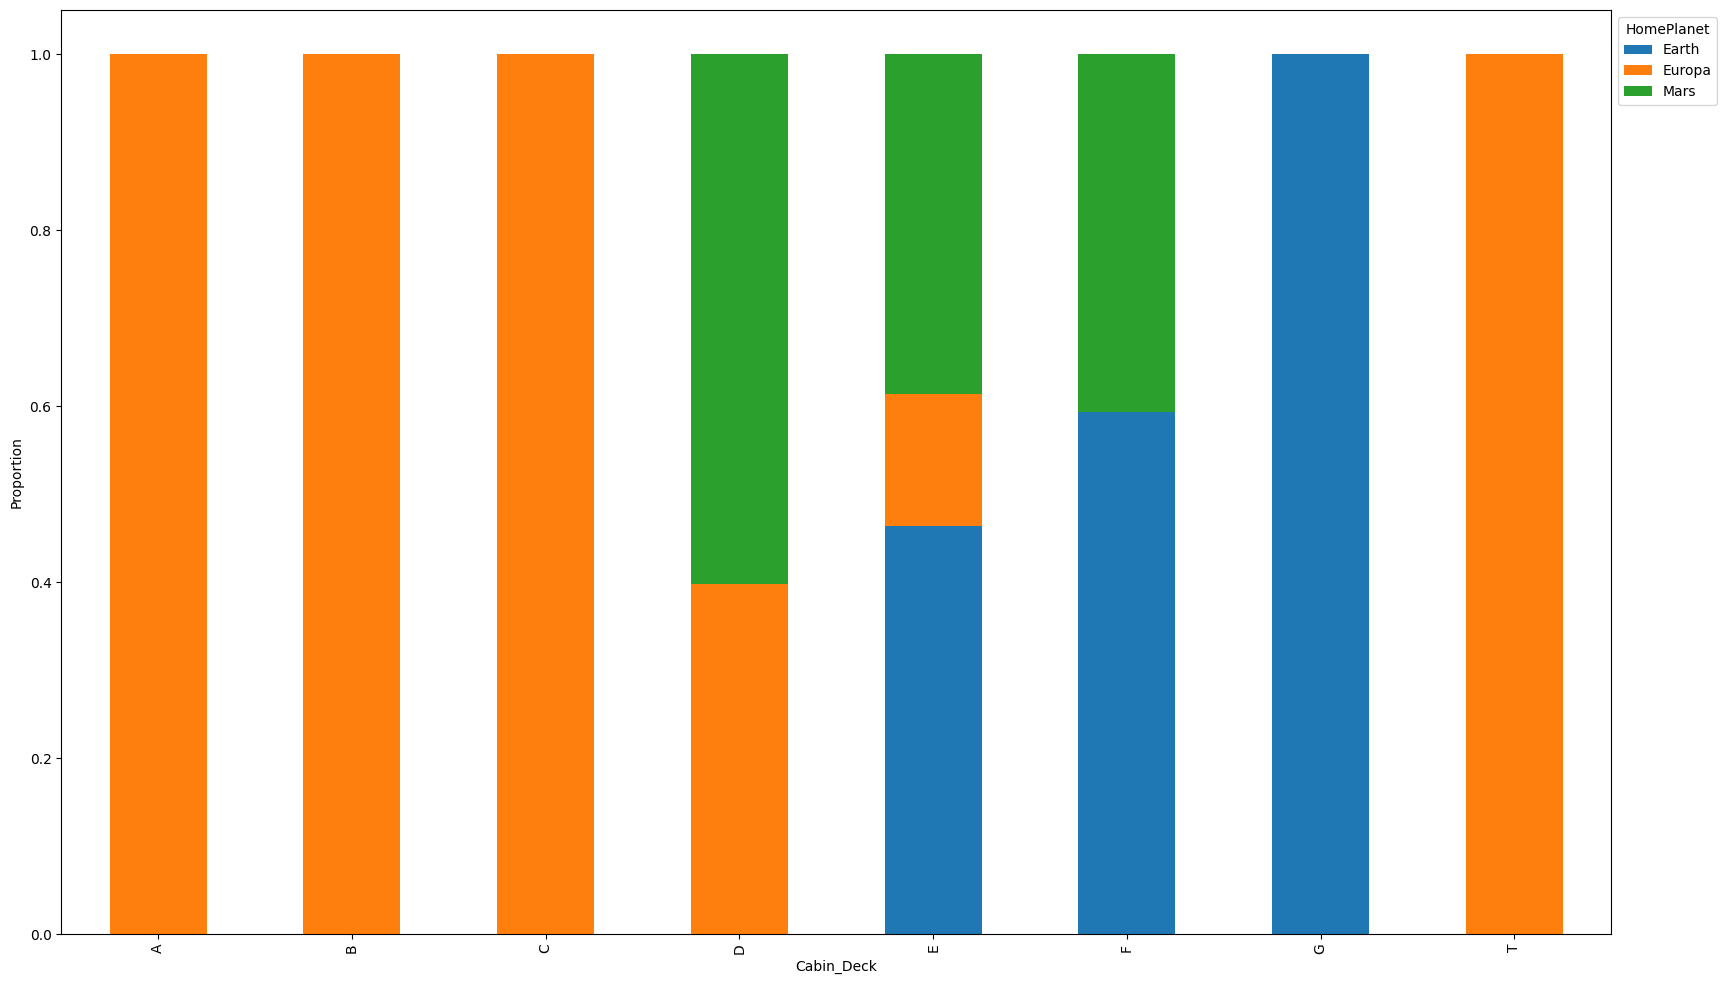

In [33]:
train_df['Cabin_Deck'] =train_df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else x)
train_df['Cabin_Nums'] =train_df['Cabin'].apply(lambda x: x[2] if pd.notna(x) else x)
train_df['Cabin_Side'] =train_df['Cabin'].apply(lambda x: x[-1] if pd.notna(x) else x)
visualize(train_df, 'Cabin_Deck', 'HomePlanet')

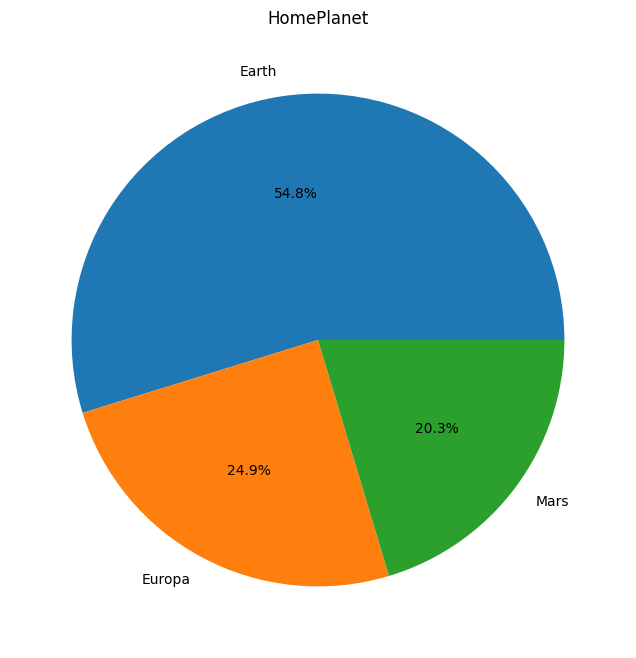

In [34]:
def HomePlanet_fill(df):
    if pd.isnull(df['HomePlanet']):
        if df['Cabin_Deck'] in ['A', 'B', 'C', 'T']:
            return 'Europa'
        elif df['Cabin_Deck'] in ['D']:
            return 'Mars'
        else:
            return 'Earth'
    else:
        return df['HomePlanet']
train_df['HomePlanet'] = train_df.apply(HomePlanet_fill, axis=1)
props(train_df, 'HomePlanet')

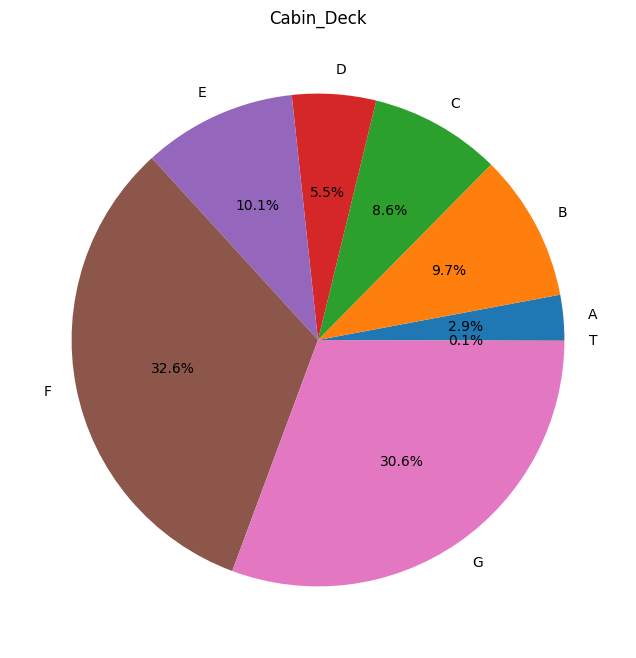

In [35]:
def CabinDeck_fill(df):
    if pd.isnull(df['Cabin_Deck']):
        if df['HomePlanet'] == 'Earth':
            return 'G'
        elif df['HomePlanet'] == 'Mars':
            return 'F'
        else:
            return 'B'
    else:
        return df['Cabin_Deck']
train_df['Cabin_Deck'] = train_df.apply(CabinDeck_fill, axis=1)
props(train_df, 'Cabin_Deck')

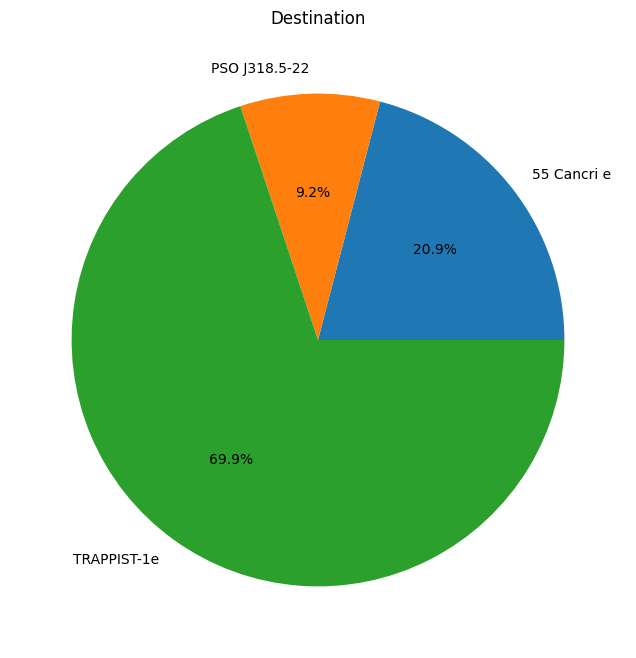

In [36]:
def Destination_fill(df):
    if pd.isnull(df['Destination']):
        if df['Cabin_Deck'] in ['A', 'B']:
            return '55 Cancri e'
        else:
            return 'TRAPPIST-1e'
    else:
        return df['Destination']
train_df['Destination'] = train_df.apply(Destination_fill, axis=1)
props(train_df, 'Destination')


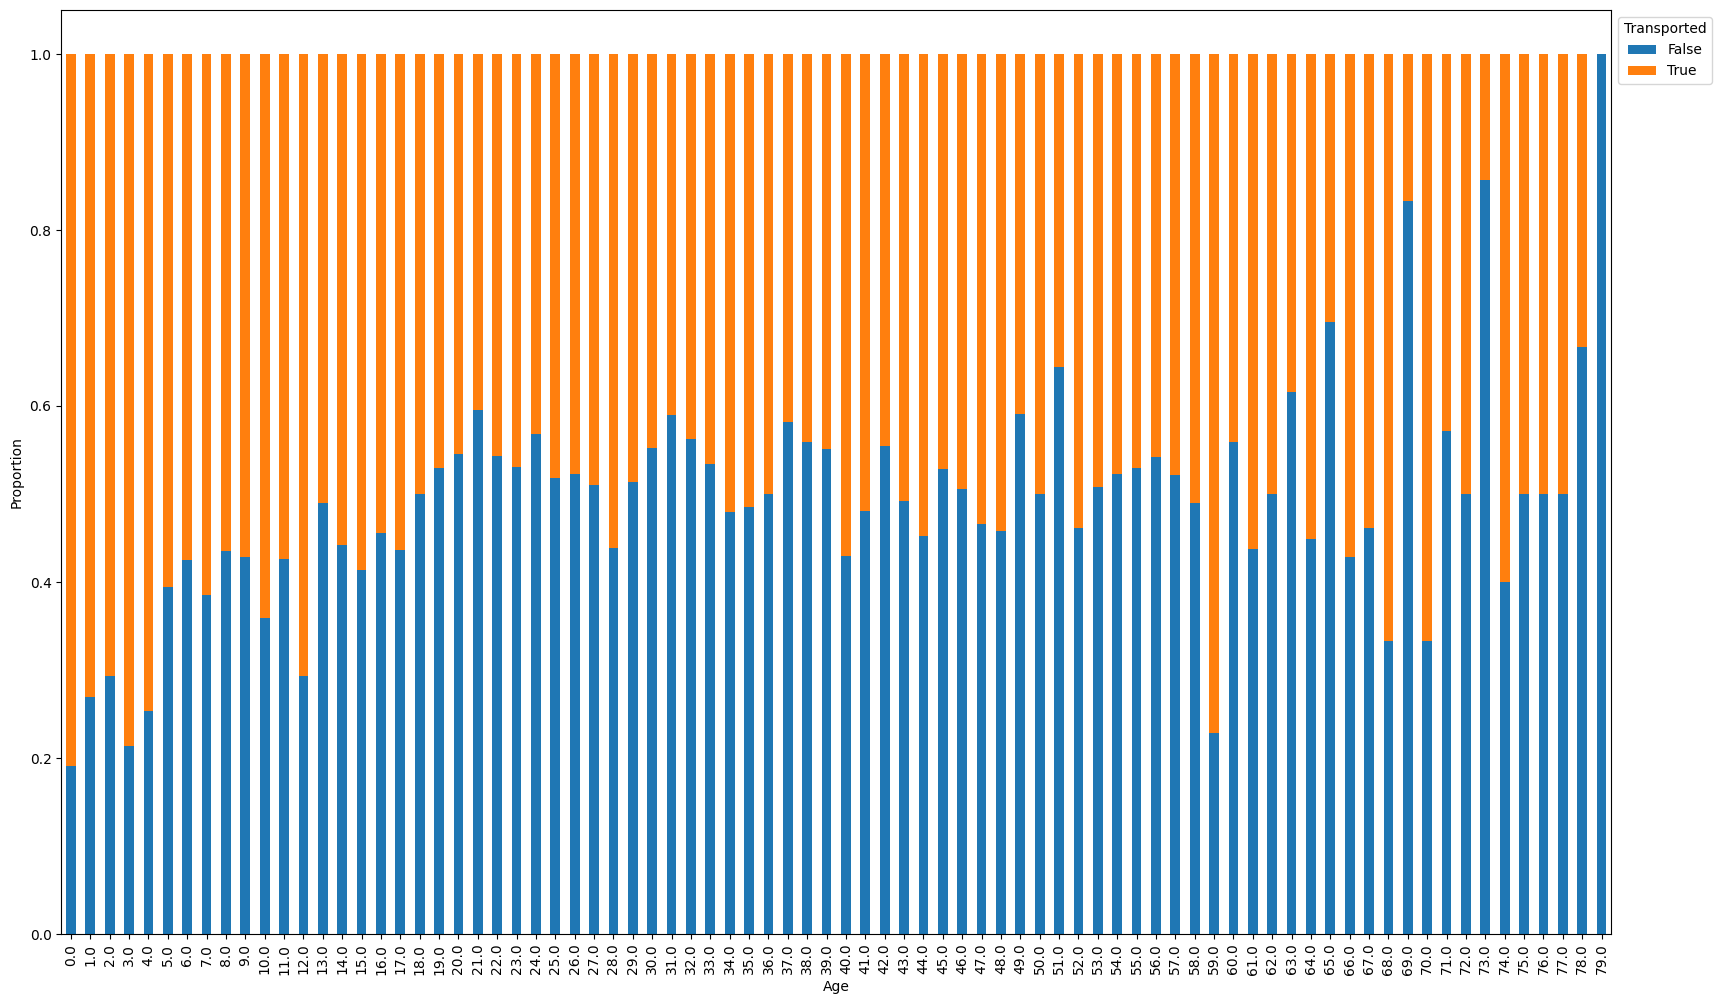

In [37]:
visualize(train_df, 'Age', 'Transported')

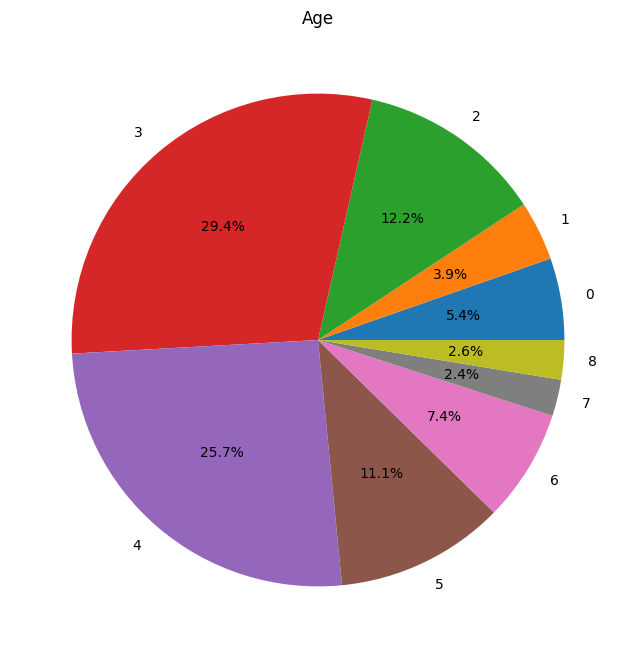

In [38]:
def encode_age(value):
    if value <=4:
        return 0
    elif value <=12:
        return 1
    elif value <=18:
        return 2
    elif value <=27:
        return 3
    elif value <=39:
        return 4
    elif value <=48:
        return 5
    elif value <=59:
        return 6
    elif value <=69:
        return 7
    else:
        return 8
train_df['Age'] = train_df['Age'].apply(encode_age)
props(train_df,'Age')

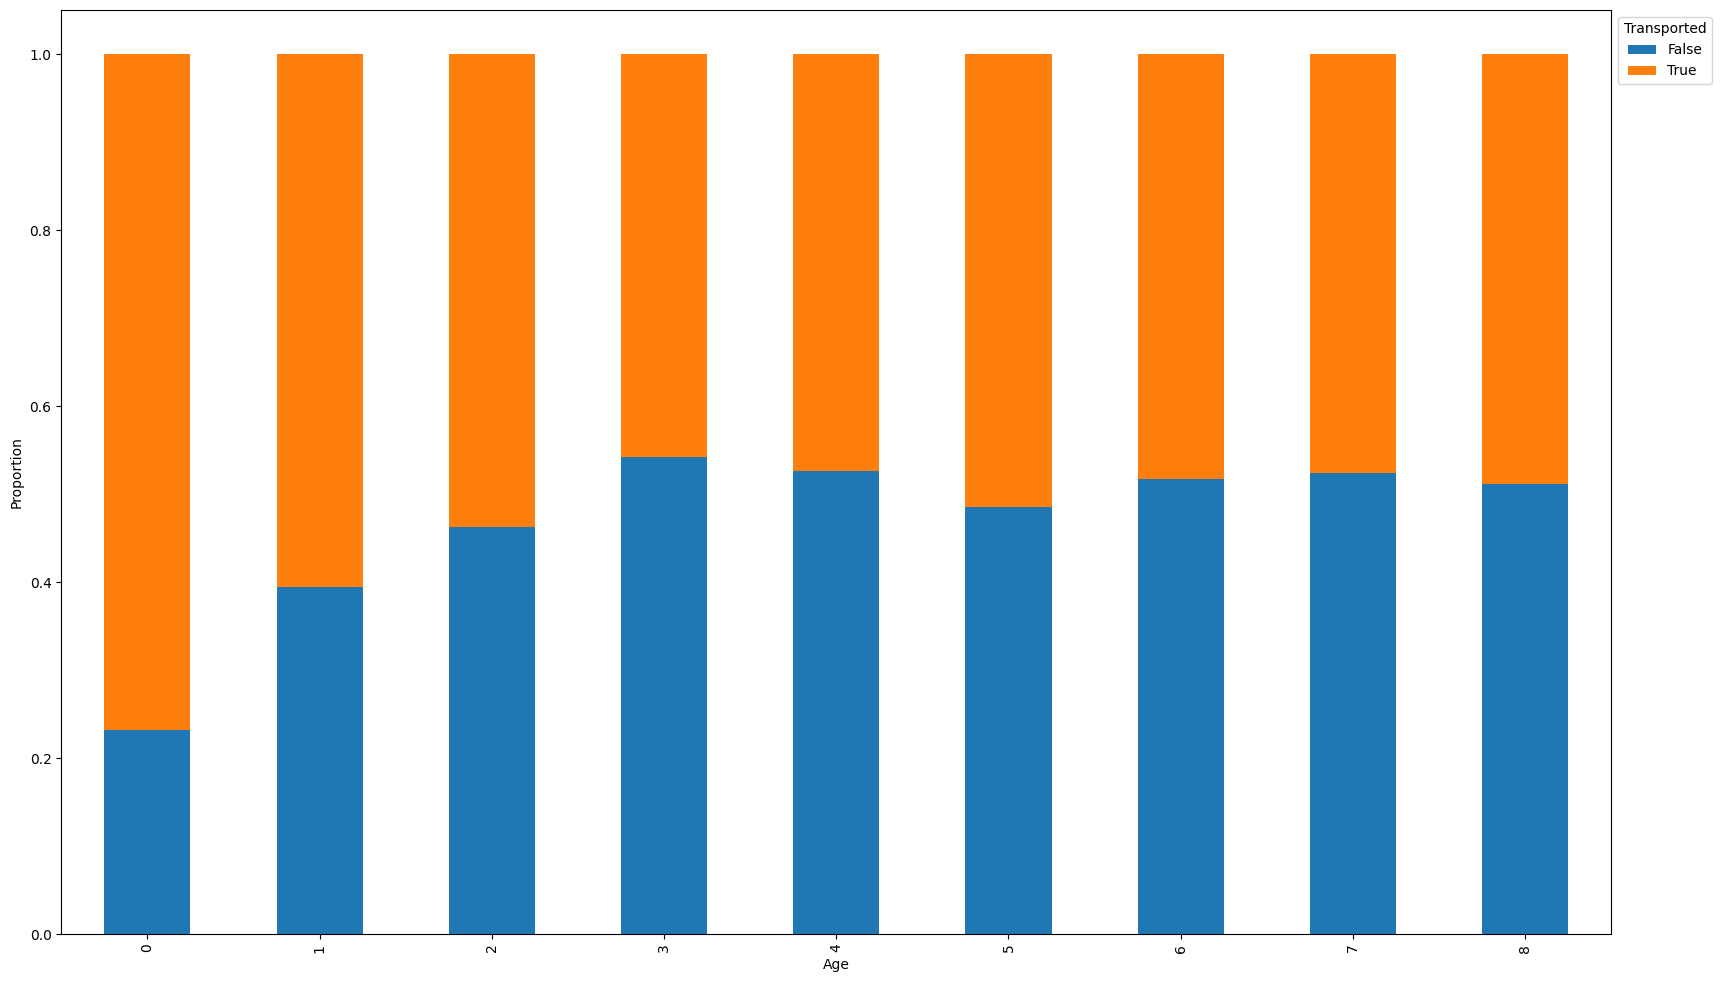

In [39]:
visualize(train_df, 'Age', 'Transported')

RoomService
0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: count, Length: 1273, dtype: int64

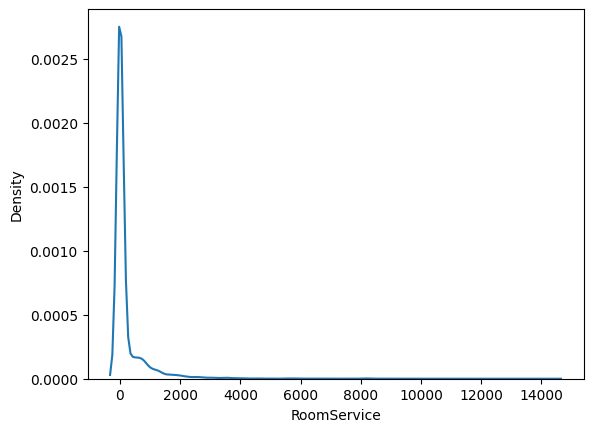

In [40]:
sns.kdeplot(train_df['RoomService'])
train_df['RoomService'].value_counts()

In [41]:
train_df['RoomService'].describe(percentiles=[0.5,0.6,0.7,0.8,0.9])

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
50%          0.000000
60%          0.000000
70%          8.000000
80%        175.600000
90%        753.000000
max      14327.000000
Name: RoomService, dtype: float64

In [42]:
def encode_rs(value):
    if value ==0:
        return 0
    elif value <=10:
        return 1
    elif value <=200:
        return 2
    elif value <=800:
        return 3
    else:
        return 4

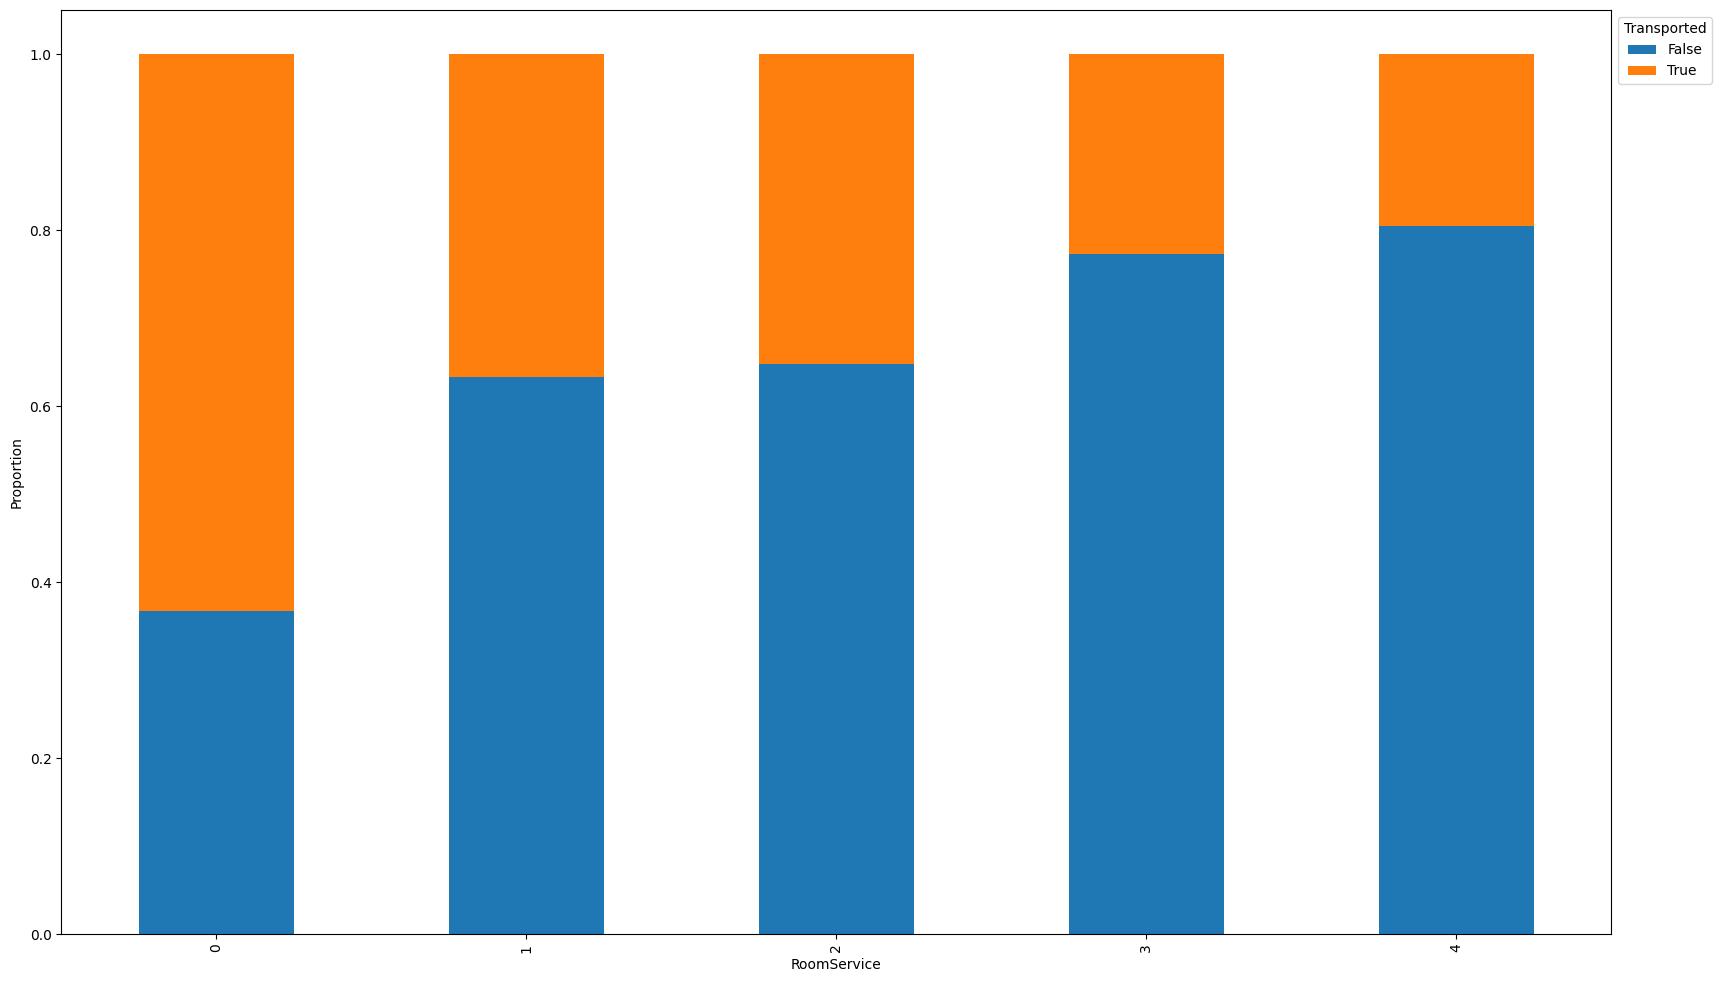

In [43]:
train_df['RoomService'] = train_df['RoomService'].apply(encode_rs)
visualize(train_df,'RoomService','Transported')

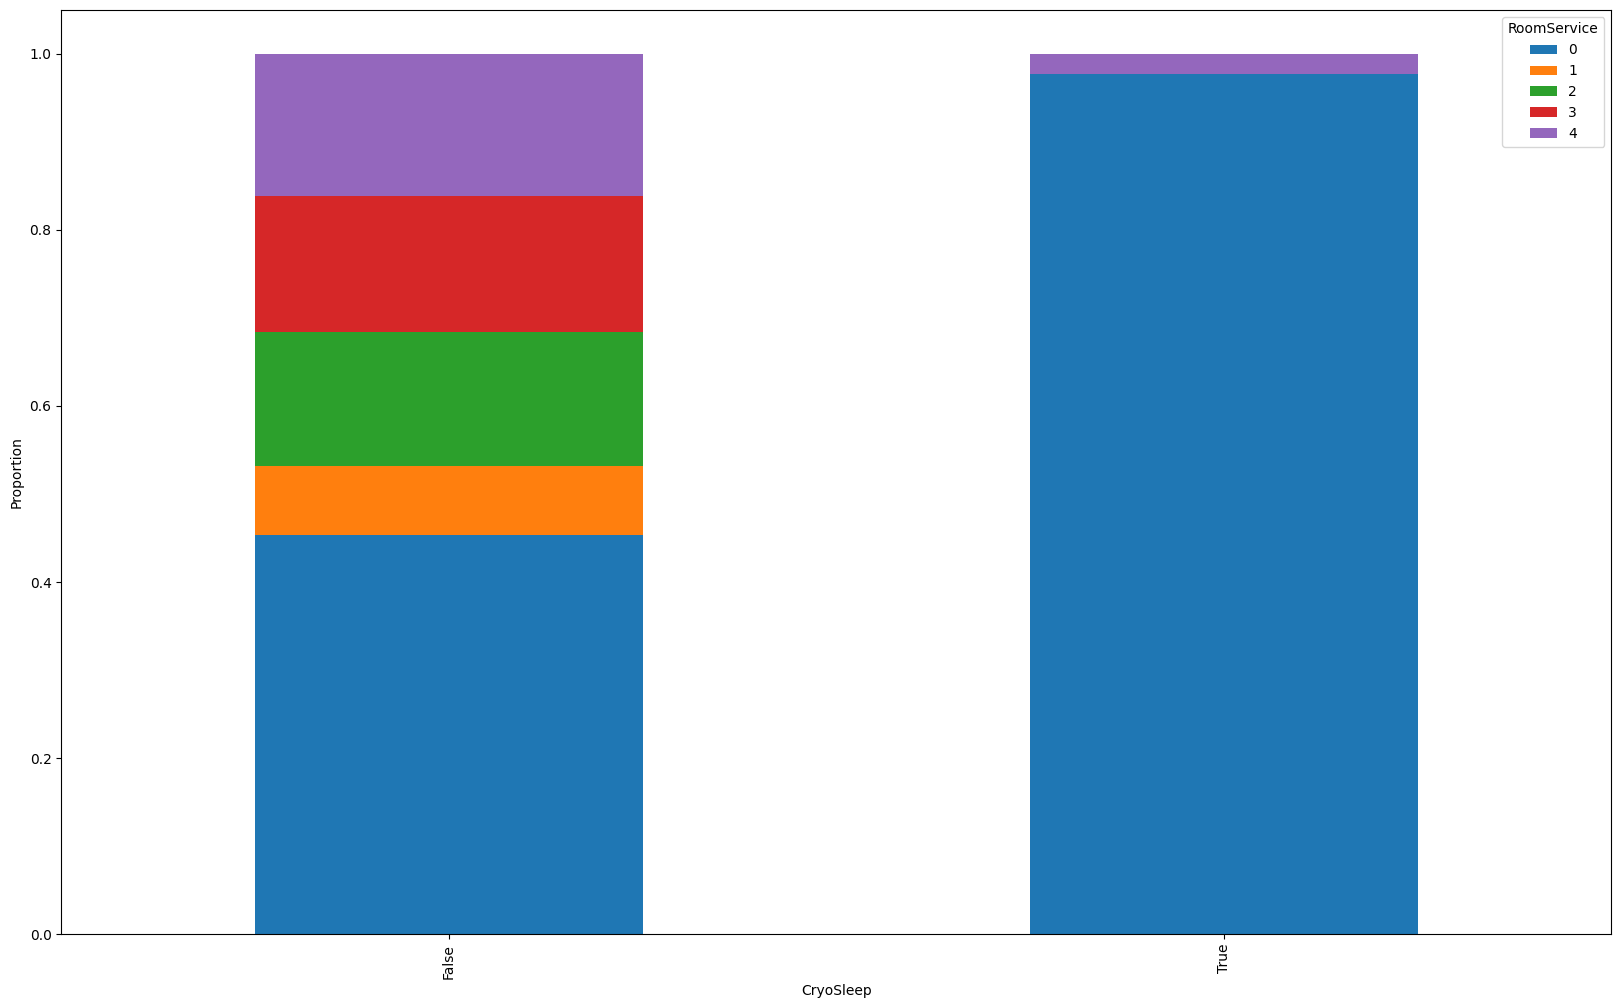

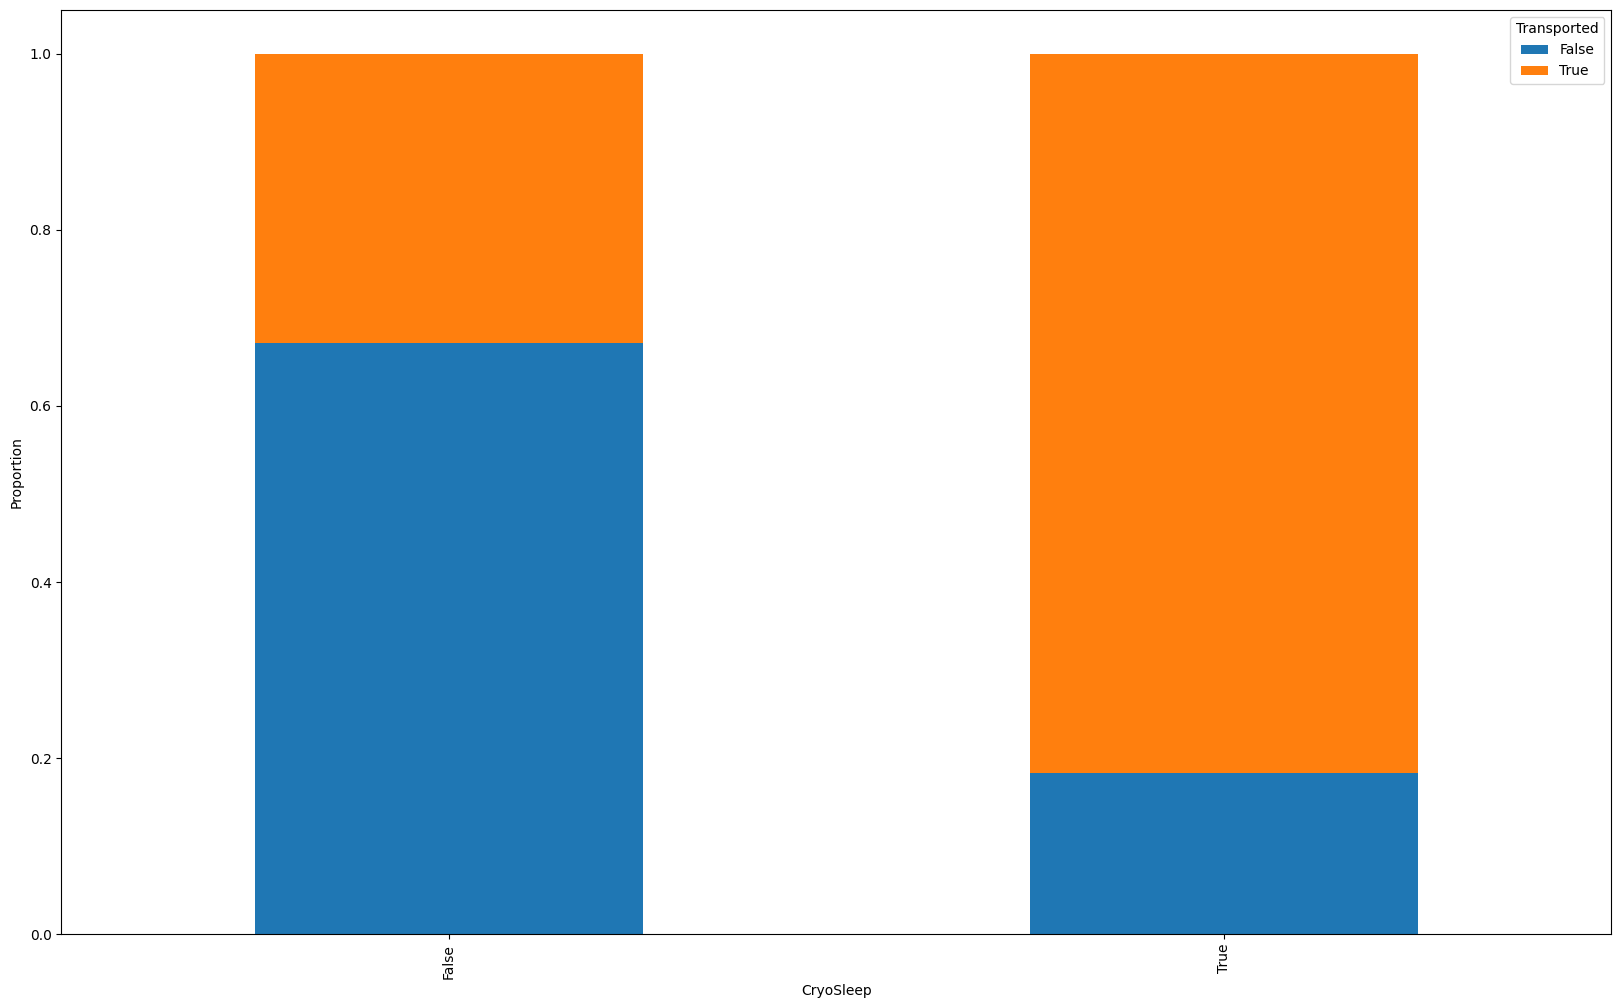

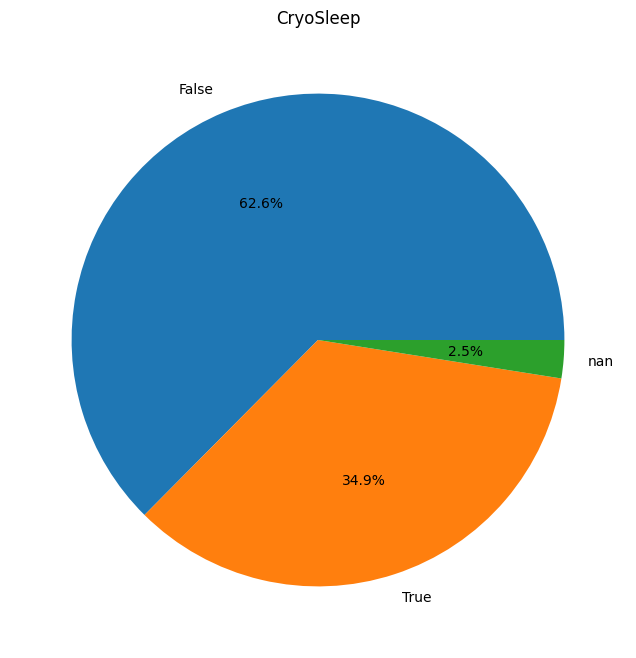

In [44]:
visualize(train_df, 'CryoSleep', 'RoomService')
visualize(train_df, 'CryoSleep', 'Transported')
props(train_df, 'CryoSleep')

In [45]:
def RS_fill(df):
    if pd.isnull(df['RoomService']):
        if df['CryoSleep'] == 'False':
            return 2
        else:
            return 0
    else:
        return df['RoomService']
train_df['RoomService'] = train_df.apply(RS_fill, axis=1)

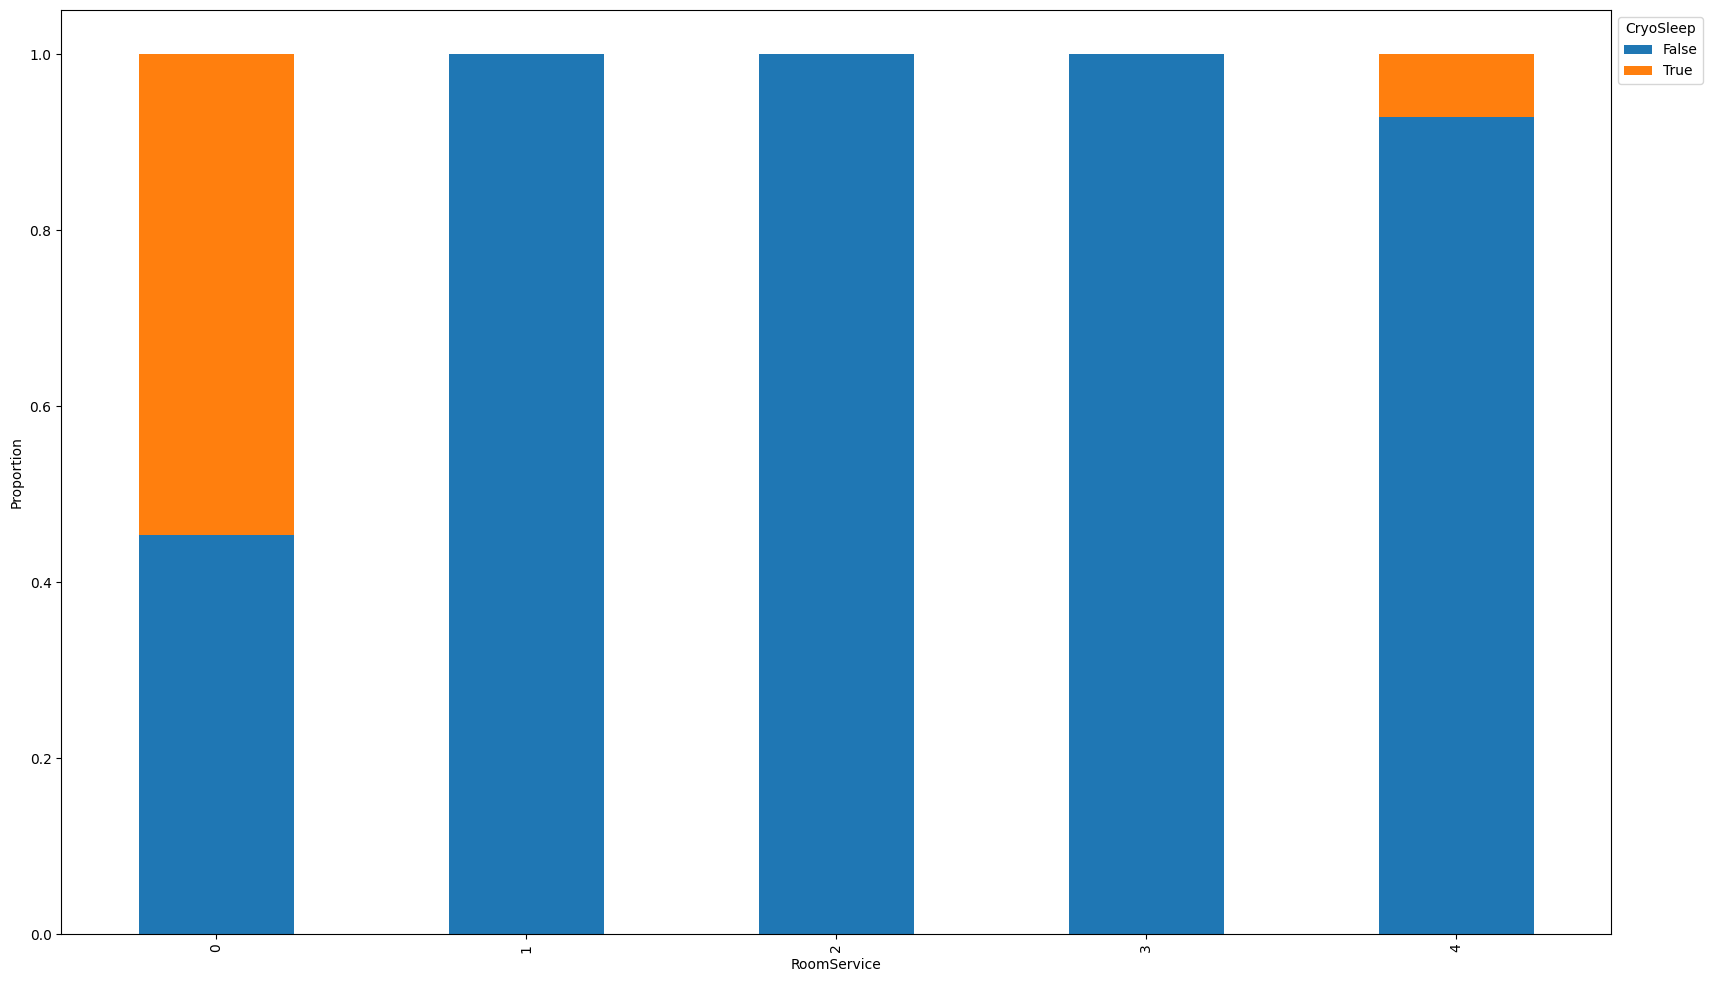

In [46]:
visualize(train_df, 'RoomService', 'CryoSleep')

In [47]:
def CoS_fill(df):
    if pd.isnull(df['CryoSleep']):
        if df['RoomService'] == 0:
            return True
        else:
            return False
    else:
        return df['CryoSleep']
train_df['CryoSleep'] = train_df.apply(CoS_fill, axis=1)

count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
50%          0.000000
60%          0.000000
70%         15.000000
80%        179.200000
90%        732.000000
max      22408.000000
Name: Spa, dtype: float64

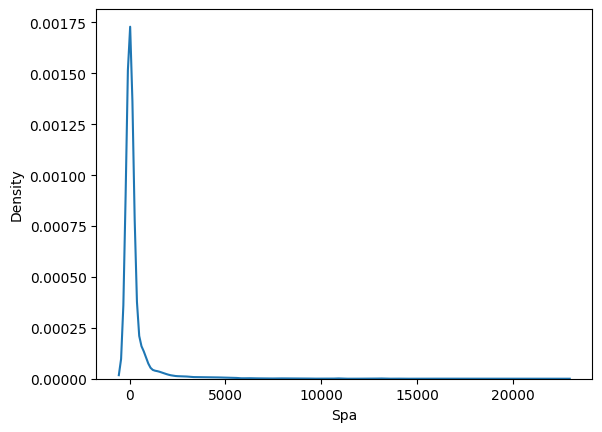

In [48]:
sns.kdeplot(train_df['Spa'])
train_df['Spa'].describe(percentiles=[0.5,0.6,0.7,0.8,0.9])

In [49]:
def encode_spa(value):
    if value == 0:
        return 0
    elif value <=20:
        return 1
    elif value <=200:
        return 2
    elif value <=800:
        return 3
    else:
        return 4

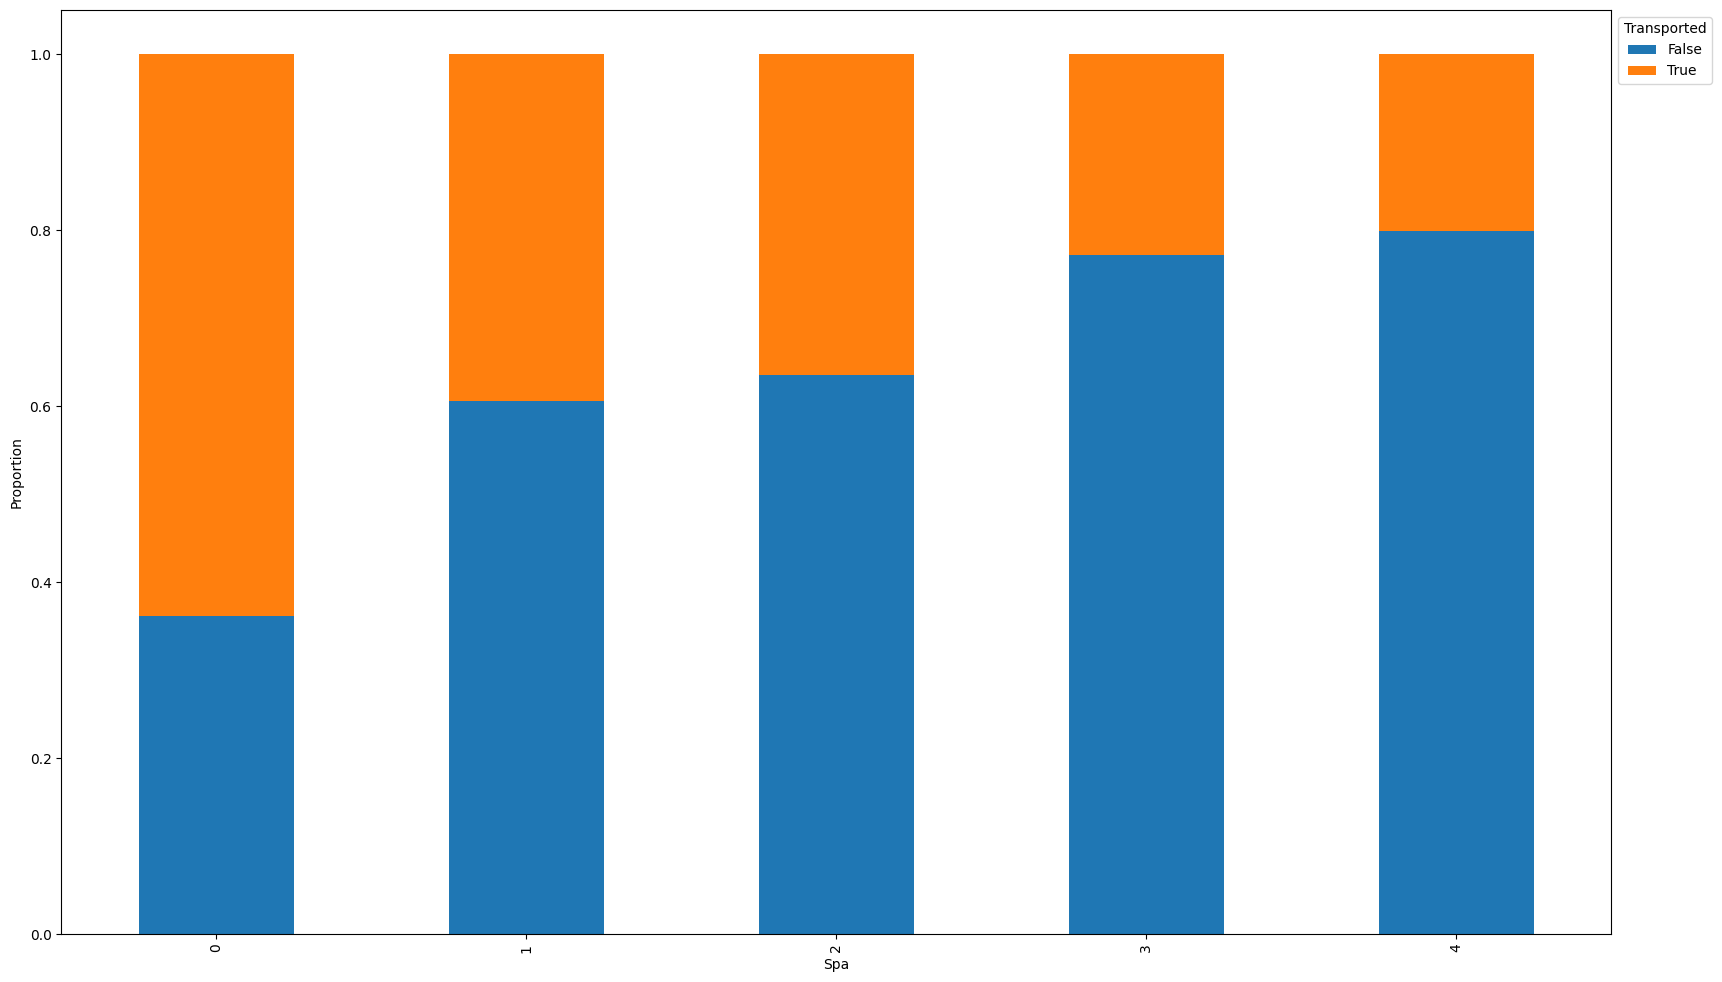

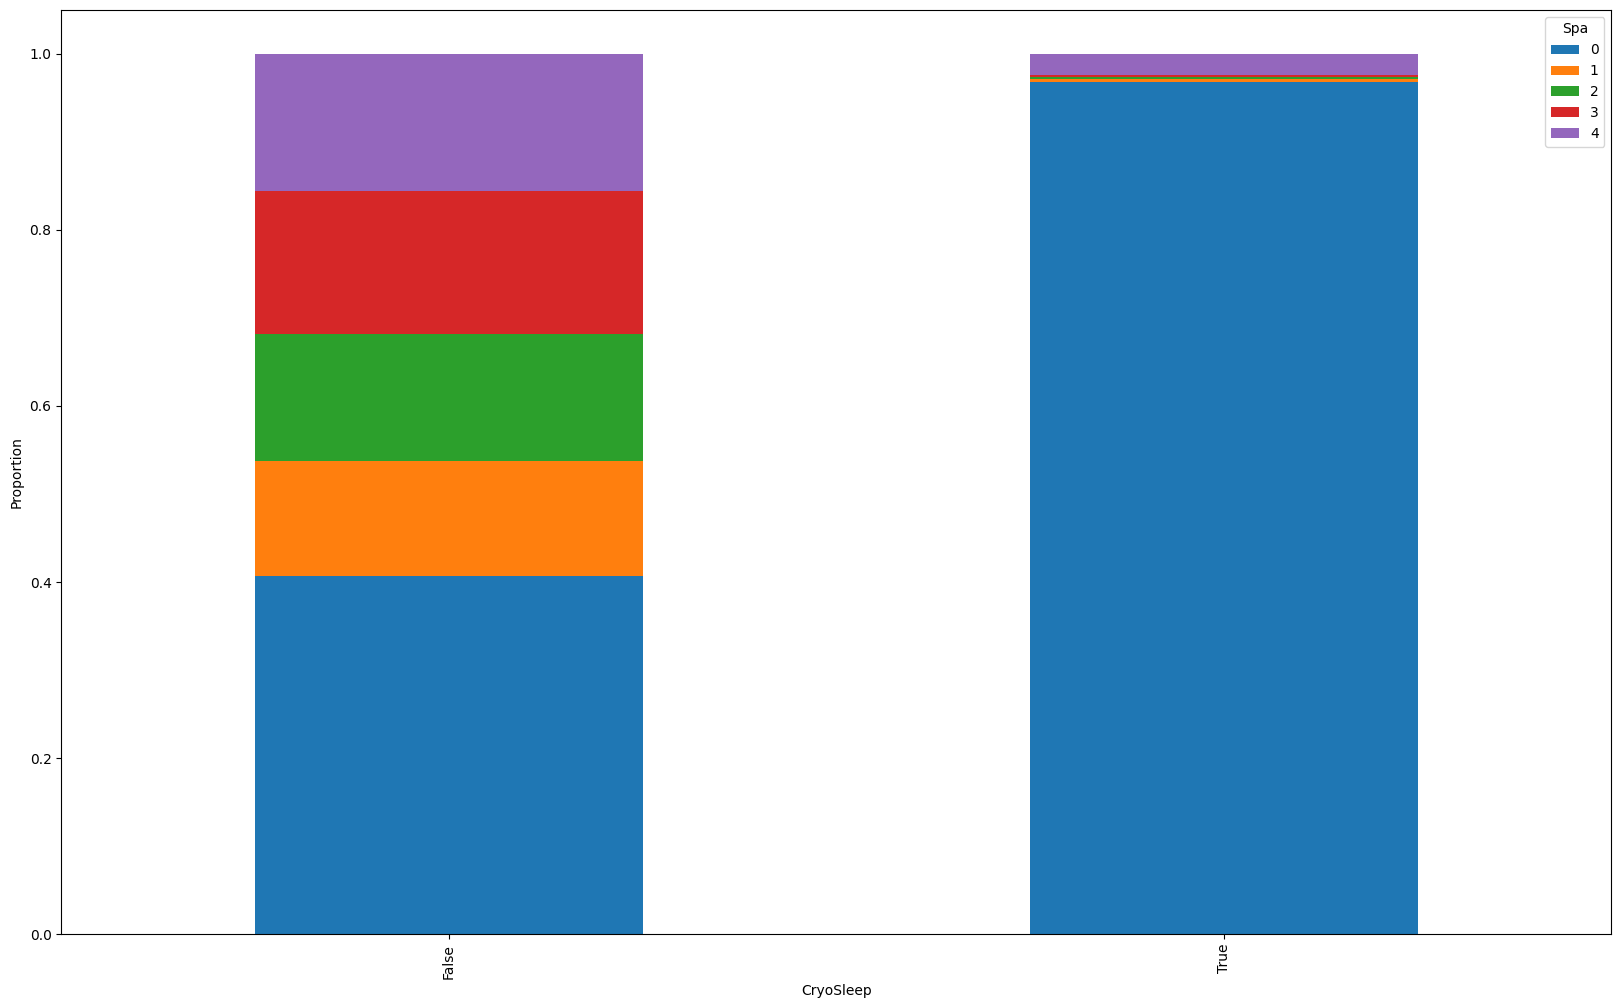

In [50]:
train_df['Spa'] = train_df['Spa'].apply(encode_spa)
visualize(train_df,'Spa', 'Transported')
visualize(train_df,'CryoSleep', 'Spa')

In [51]:
def Spa_fill(df):
    if pd.isnull(df['Spa']):
        if df['CryoSleep'] == True:
            return 0
        else:
            return 2
    else:
        return df['Spa']
train_df['Spa'] = train_df.apply(Spa_fill, axis=1)

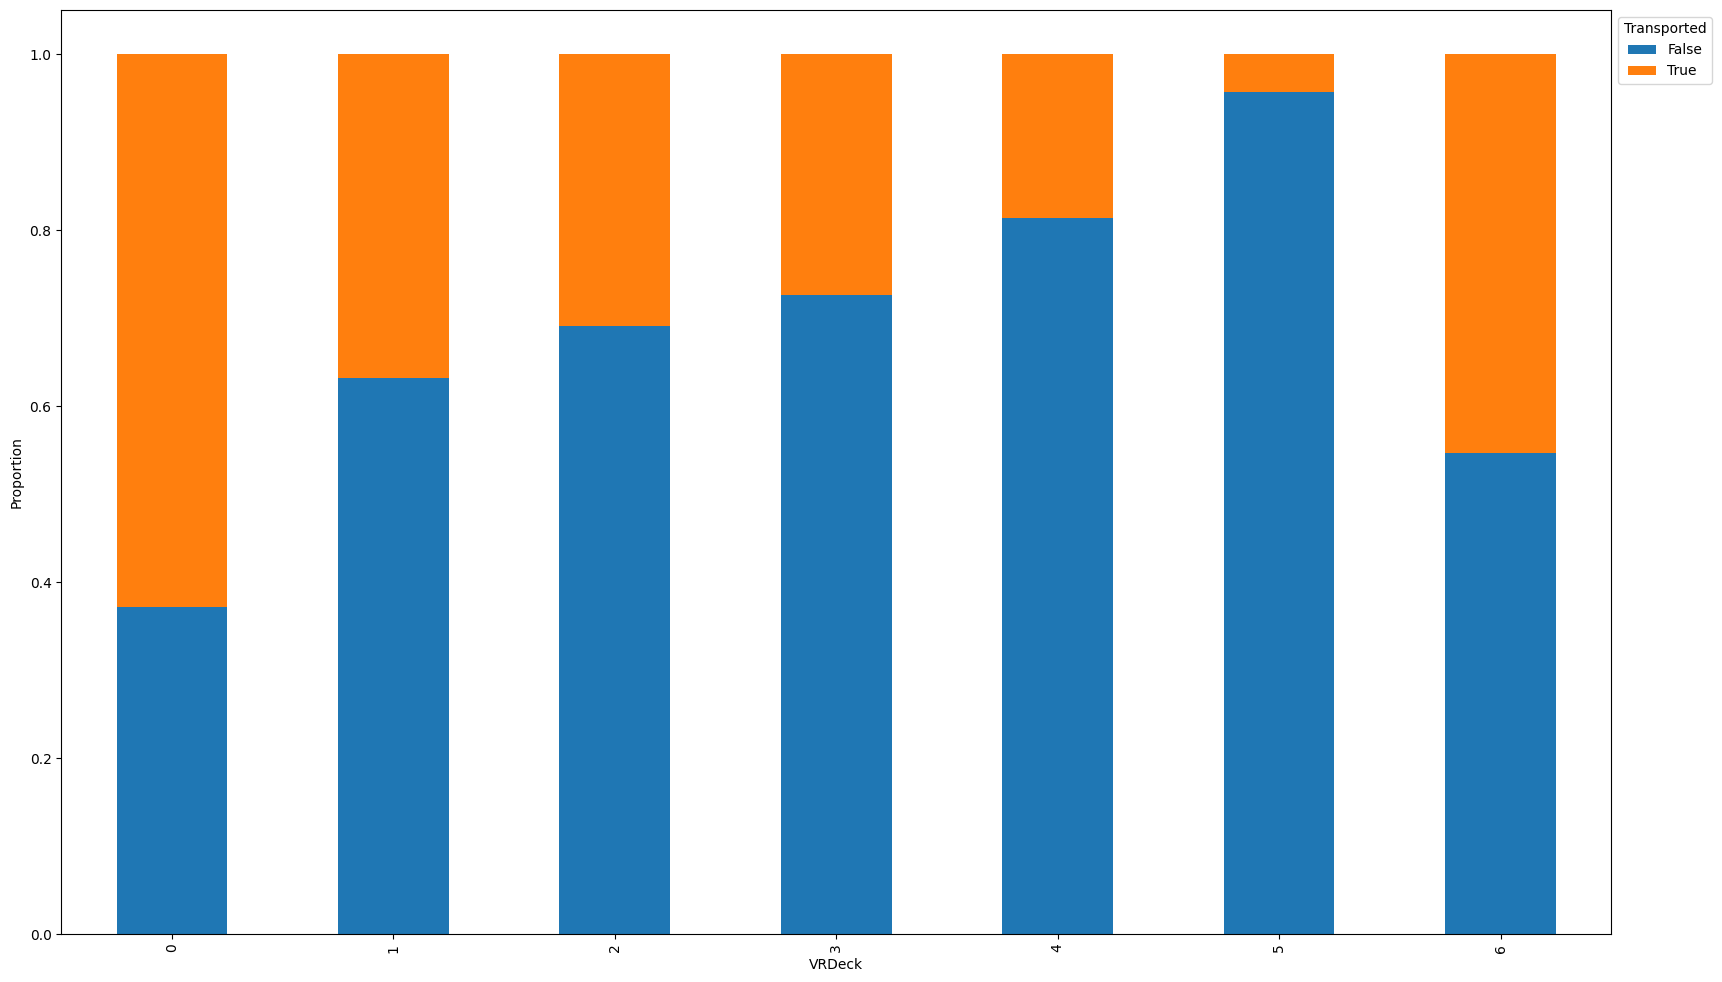

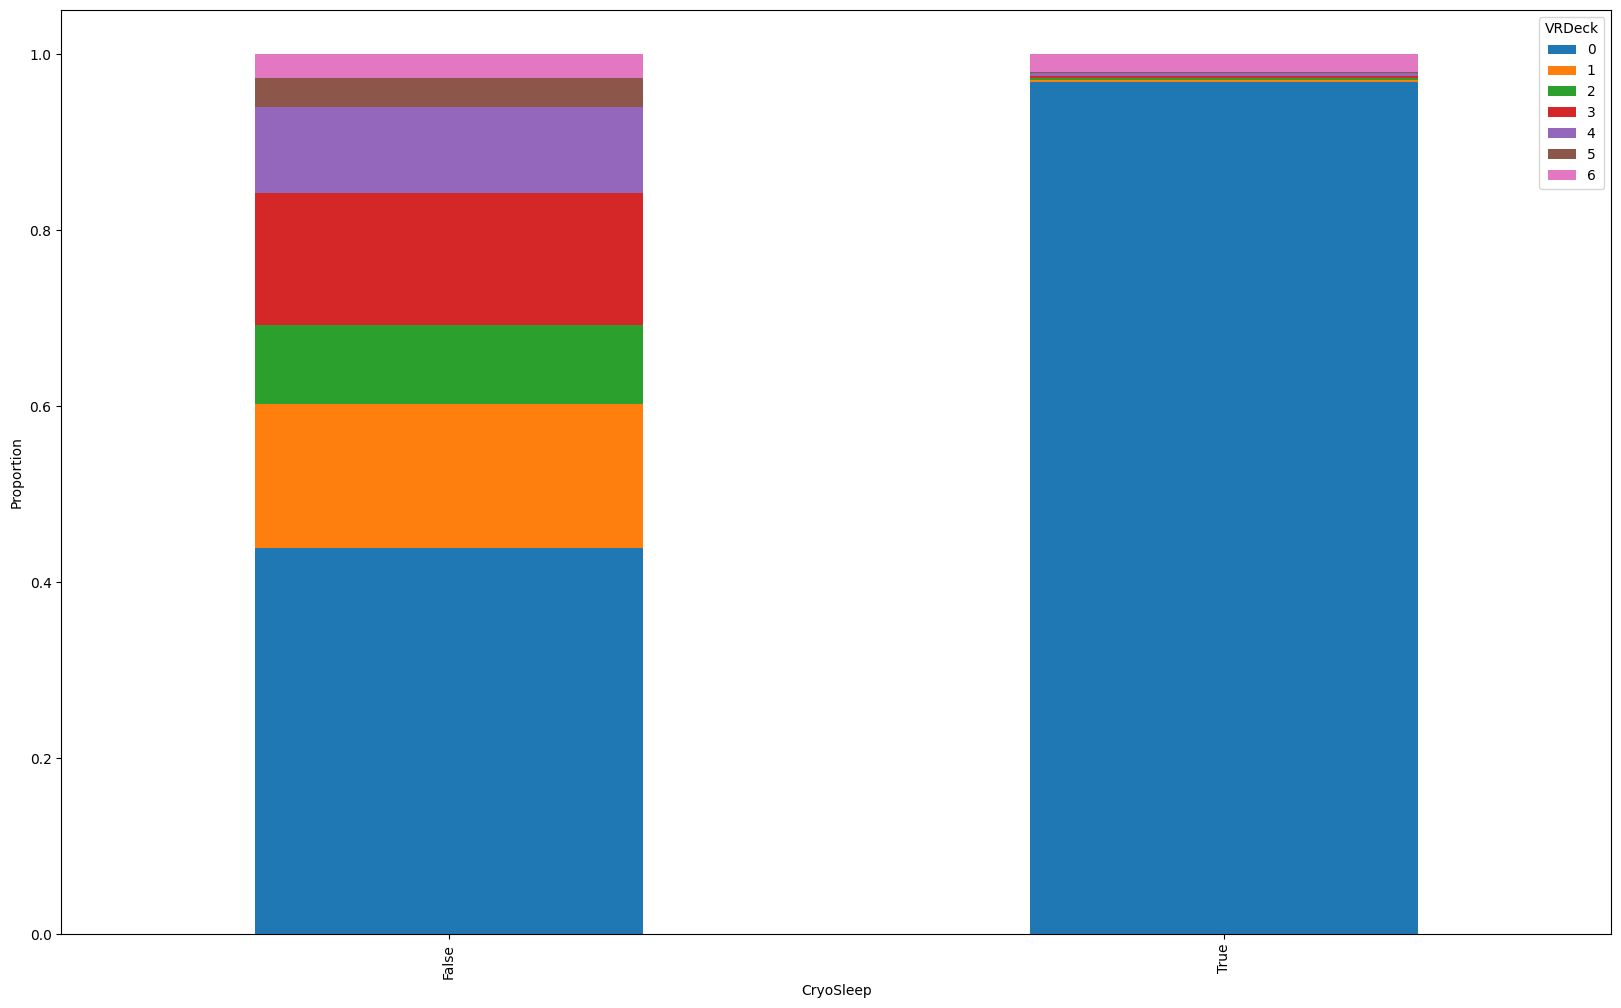

In [52]:
def encode_vr(value):
    if value ==0:
        return 0
    elif value <=50:
        return 1
    elif value <=200:
        return 2
    elif value <=800:
        return 3
    elif value <=3000:
        return 4
    elif value <=10000:
        return 5
    else:
        return 6
train_df['VRDeck'] = train_df['VRDeck'].apply(encode_vr)
visualize(train_df, 'VRDeck', 'Transported')
visualize(train_df, 'CryoSleep', 'VRDeck')

In [53]:
def vr_fill(df):
    if pd.isnull(df['VRDeck']):
        if df['CryoSleep'] == False:
            return 0
        else:
            return 3
    else:
        return df['VRDeck']
train_df['VRDeck'] = train_df.apply(vr_fill, axis=1)

In [54]:
def encode_sm(value):
    if value == 0:
        return 0
    elif value <=30:
        return 1
    elif value <=300:
        return 2
    elif value <=1000:
        return 3
    elif value <=5000:
        return 4
    else:
        return 5
train_df['ShoppingMall'] = train_df['ShoppingMall'].apply(encode_sm)

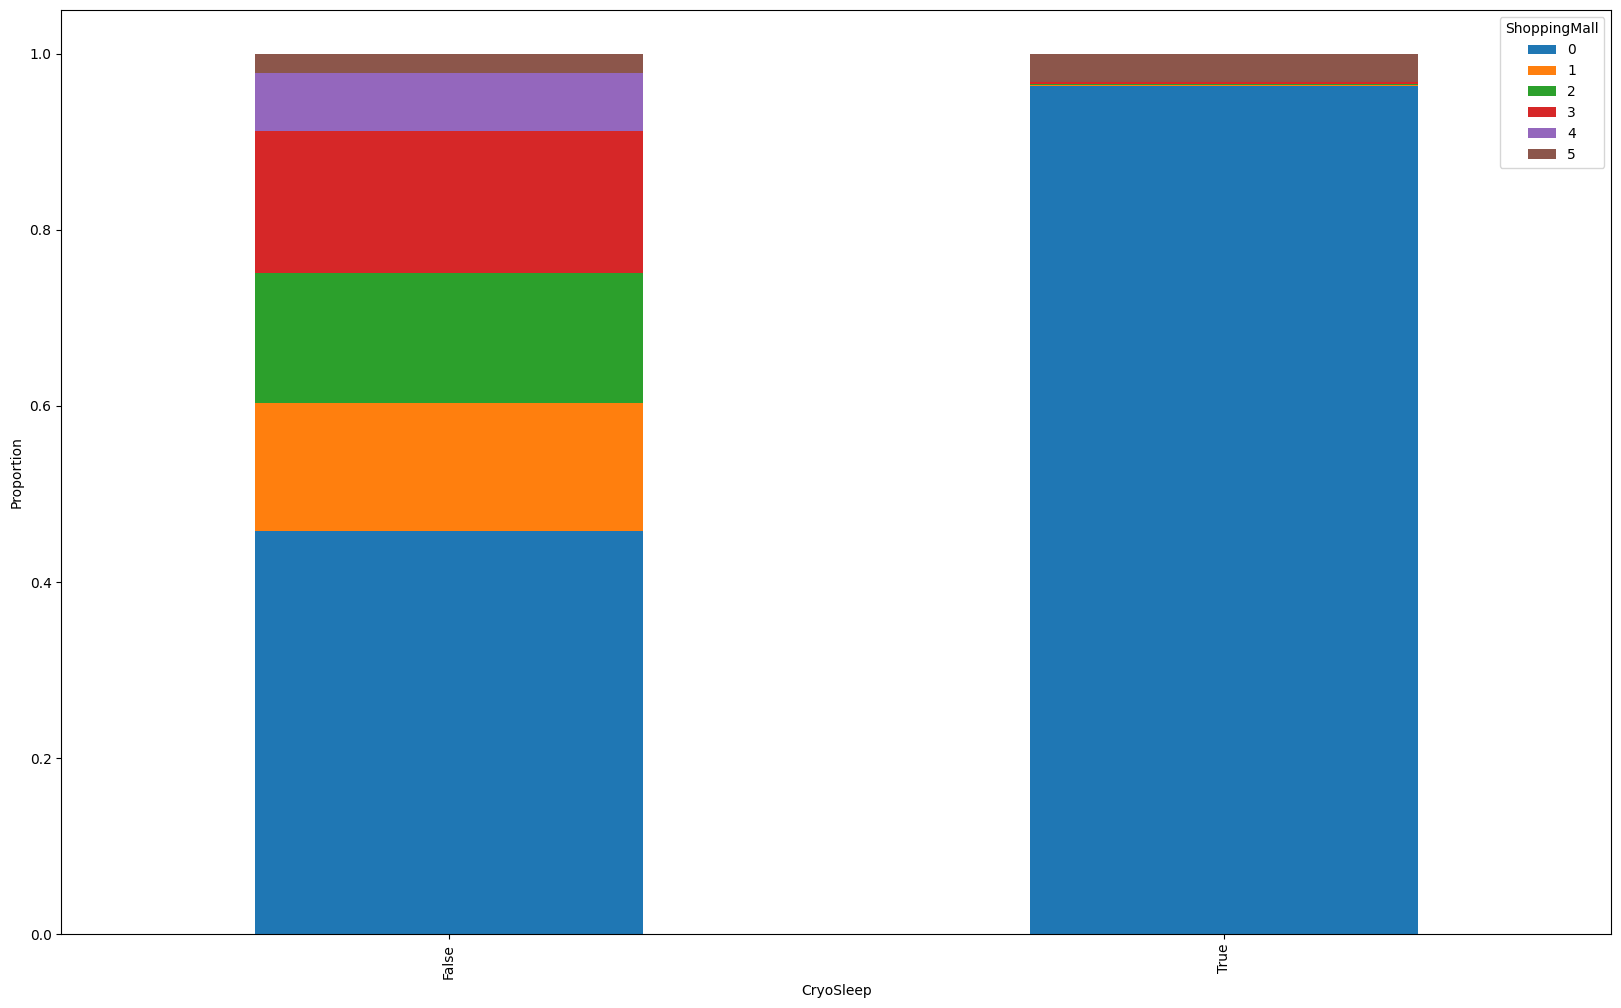

In [55]:
visualize(train_df, 'CryoSleep', 'ShoppingMall')

In [56]:
def sm_fill(df):
    if pd.isnull(df['ShoppingMall']):
        if df['CryoSleep'] == False:
            return 0
        else:
            return 2
    else:
        return df['ShoppingMall']
train_df['ShoppingMall'] = train_df.apply(sm_fill, axis=1)

In [57]:
def encode_fc(value):
    if value ==0:
        return 0
    elif value <=100:
        return 1
    elif value <=600:
        return 2
    elif value <=2000:
        return 3
    else:
        return 4
train_df['FoodCourt'] = train_df['FoodCourt'].apply(encode_fc)

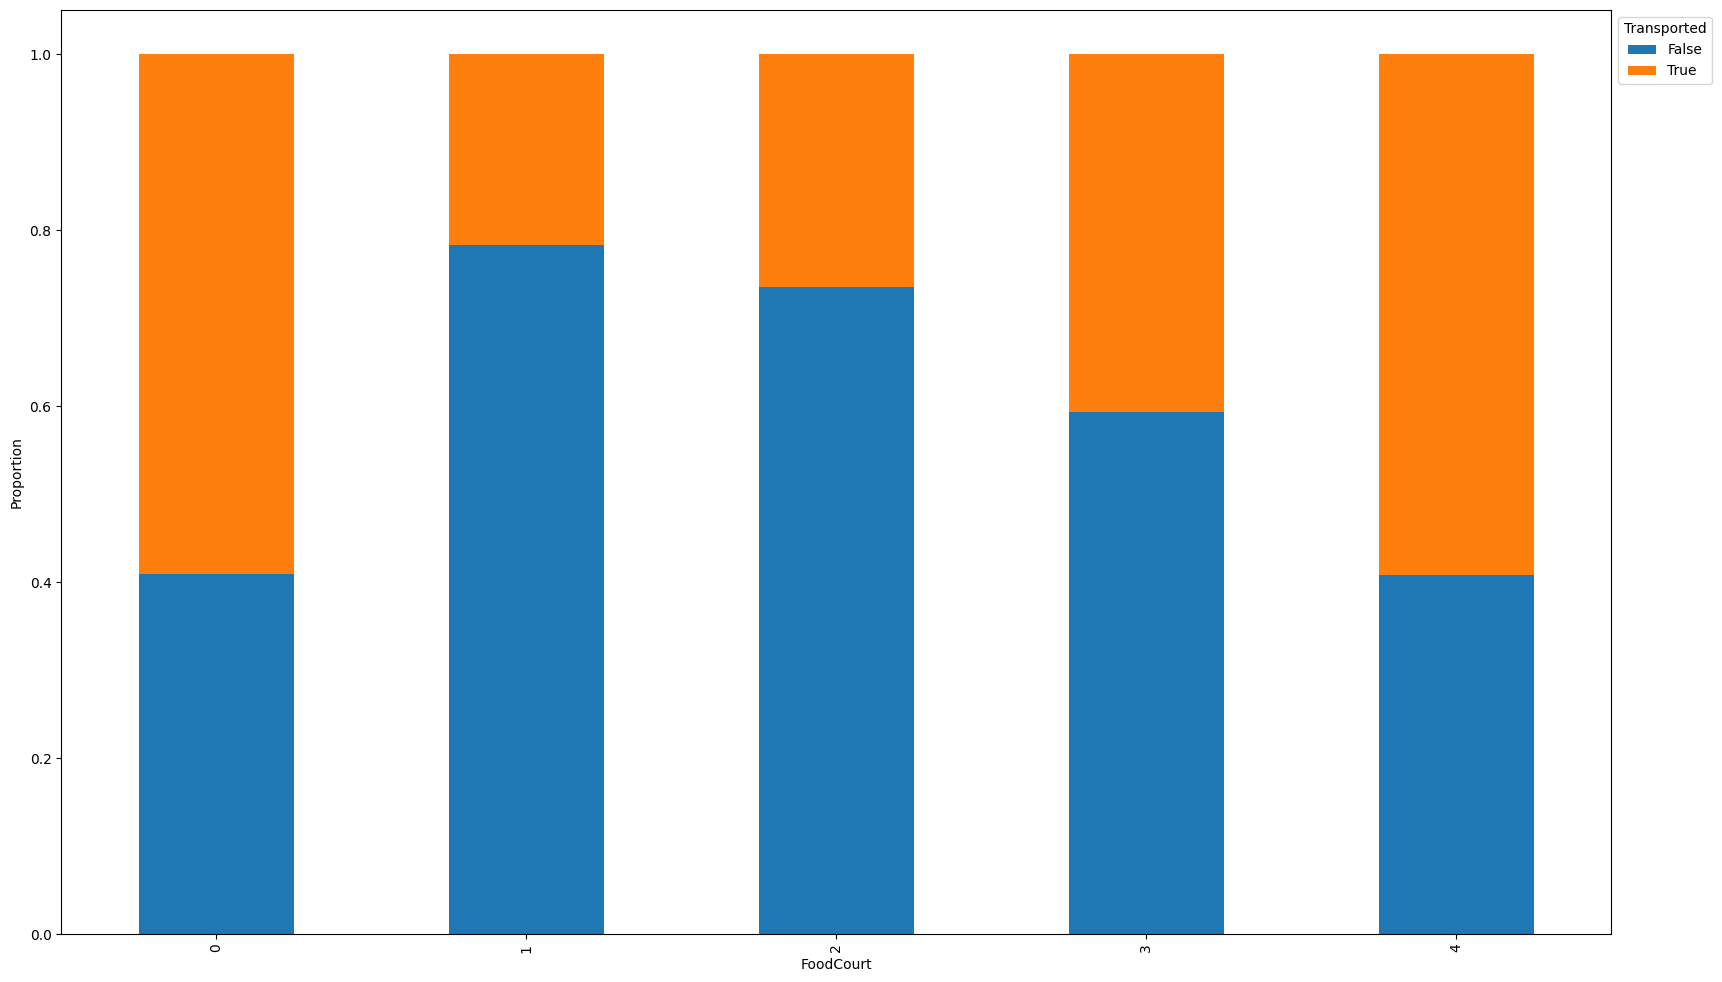

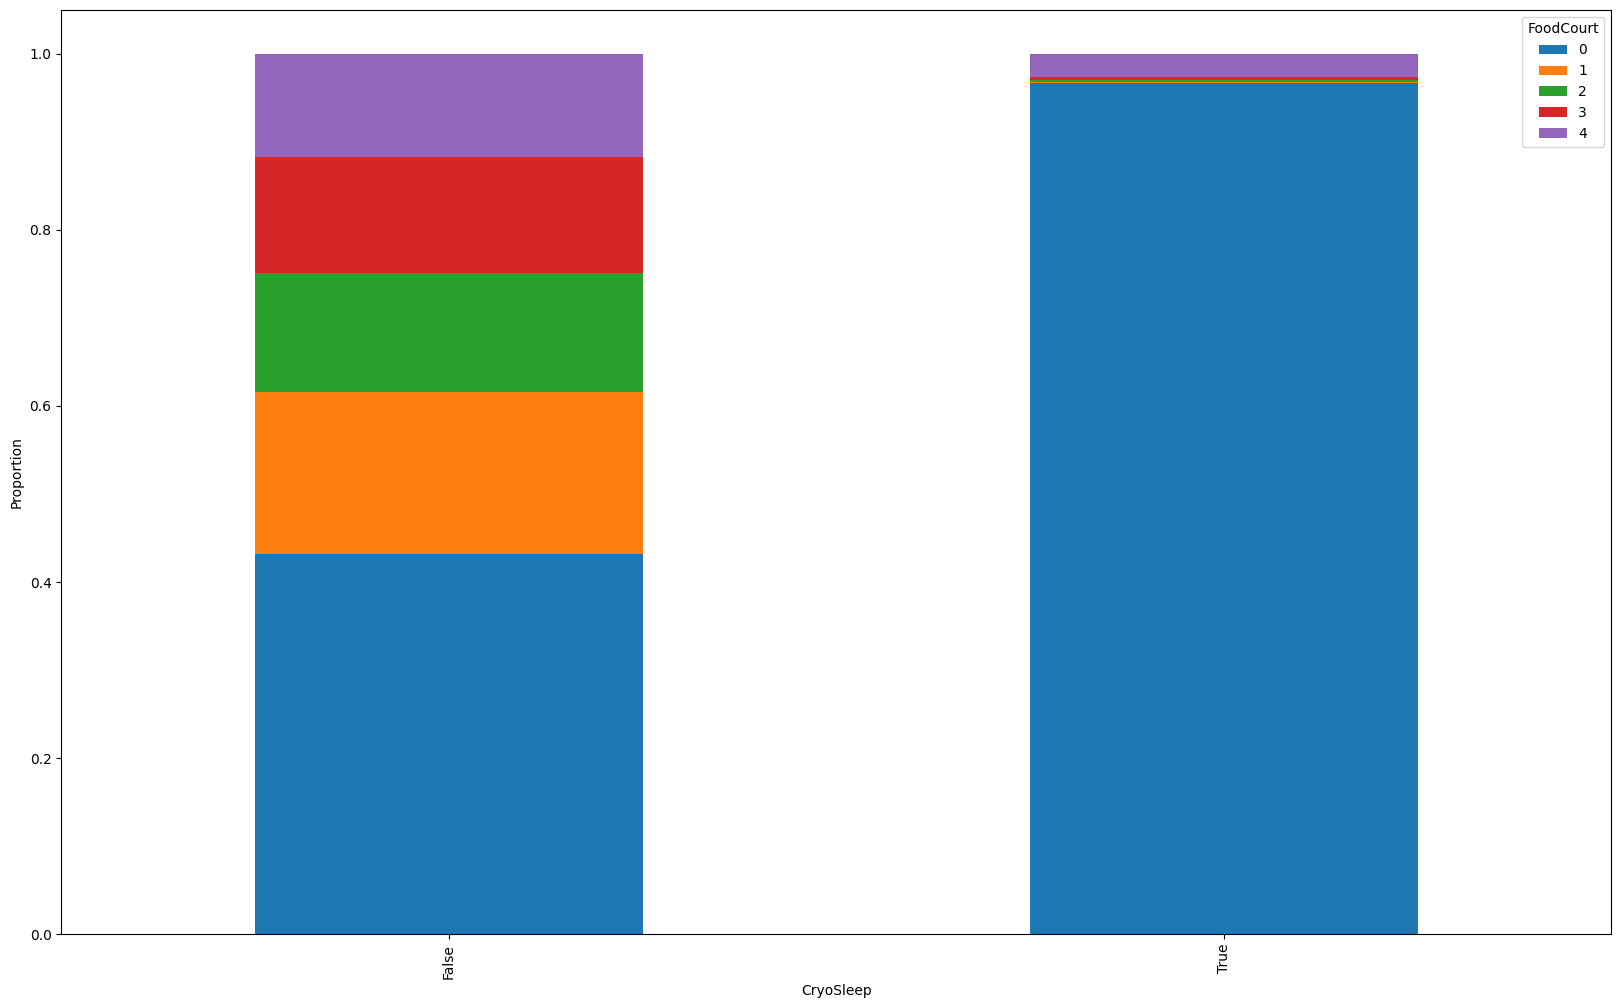

In [58]:
visualize(train_df, 'FoodCourt', 'Transported')
visualize(train_df, 'CryoSleep', 'FoodCourt')

In [59]:
def fc_fill(df):
    if pd.isnull(df['FoodCourt']):
        if df['CryoSleep'] == False:
            return 0
        else:
            return 1
    else:
        return df['FoodCourt']
train_df['FoodCourt'] = train_df.apply(fc_fill, axis=1)

In [60]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HomePlanet    8693 non-null   object
 1   CryoSleep     8693 non-null   bool  
 2   Cabin         8494 non-null   object
 3   Destination   8693 non-null   object
 4   Age           8693 non-null   int64 
 5   VIP           8490 non-null   object
 6   RoomService   8693 non-null   int64 
 7   FoodCourt     8693 non-null   int64 
 8   ShoppingMall  8693 non-null   int64 
 9   Spa           8693 non-null   int64 
 10  VRDeck        8693 non-null   int64 
 11  Transported   8693 non-null   bool  
 12  Cabin_Deck    8693 non-null   object
 13  Cabin_Nums    8494 non-null   object
 14  Cabin_Side    8494 non-null   object
dtypes: bool(2), int64(6), object(7)
memory usage: 900.0+ KB


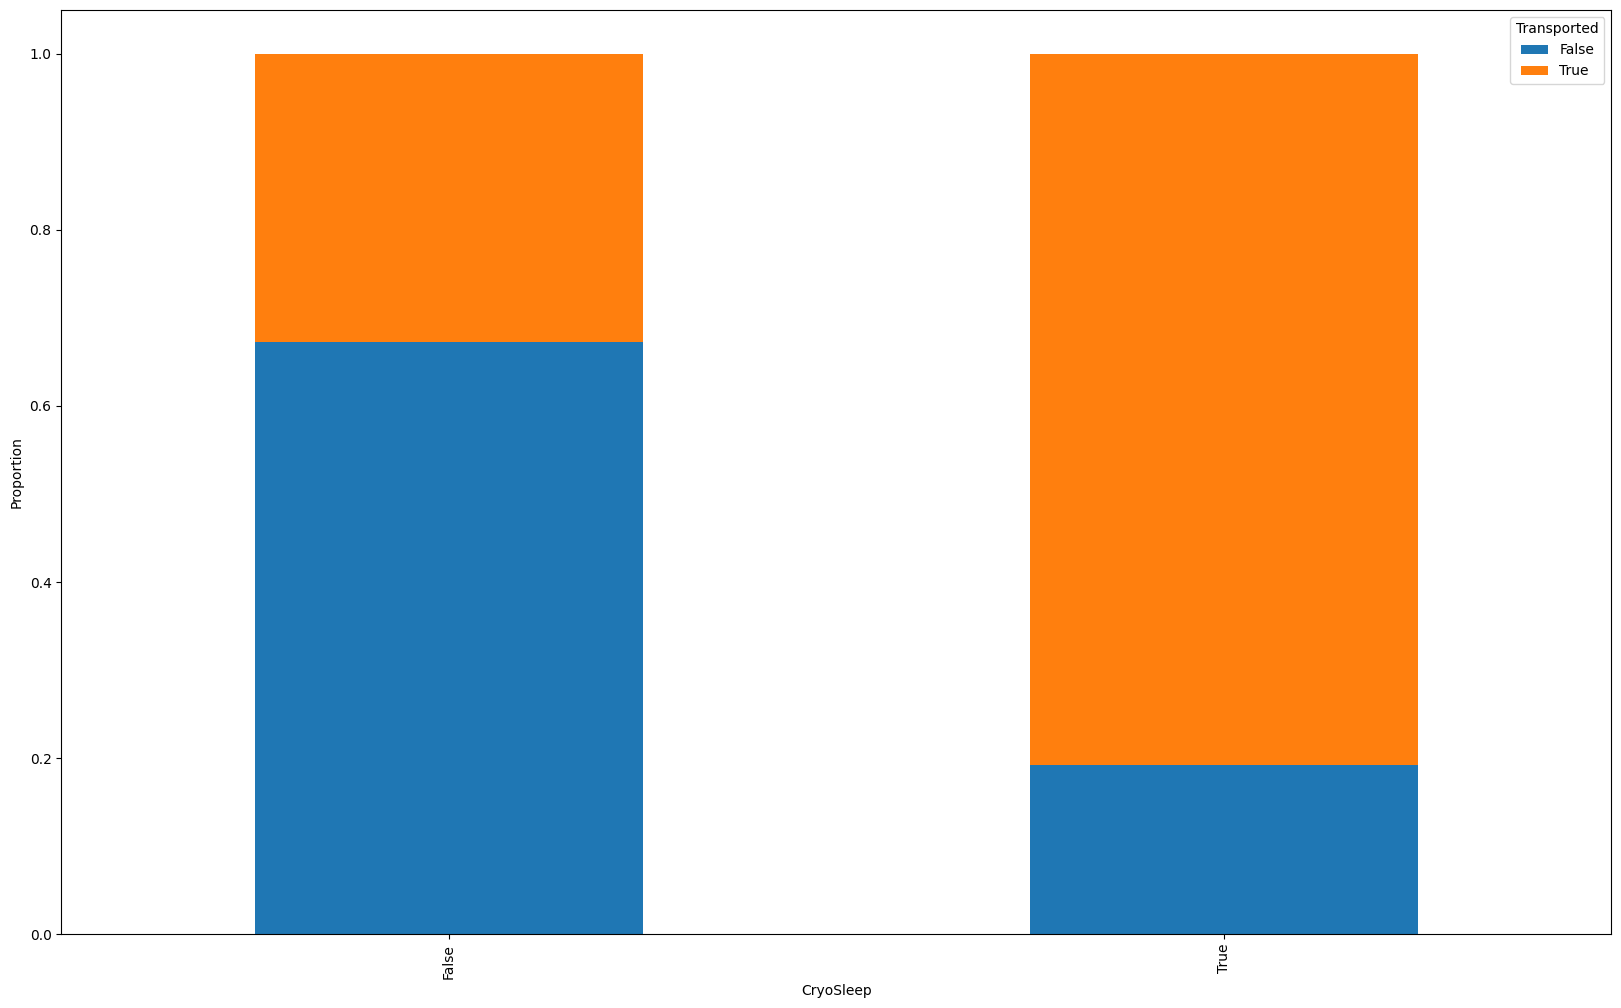

In [62]:
visualize(train_df, 'CryoSleep', 'Transported')

In [64]:
label_encoder = LabelEncoder()
scaler = StandardScaler()
df = train_df.apply(lambda x: label_encoder.fit_transform(x) if x.dtype=='O' else x)
trainup = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
cov_matrix = trainup.cov()

In [65]:
cov_matrix

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Nums,Cabin_Side
HomePlanet,1.000115,0.083538,-0.478704,0.029533,0.128718,0.052117,0.167574,-0.023643,0.081285,-0.002203,-0.058930,0.116965,-0.423292,-0.042762,0.002237
CryoSleep,0.083538,1.000115,0.113740,-0.095796,-0.069037,-0.028893,-0.469110,-0.430574,-0.391676,-0.472858,-0.405059,0.462878,0.013255,0.028868,0.025215
Cabin,-0.478704,0.113740,1.000115,0.125477,-0.229979,-0.053164,-0.049673,-0.270915,-0.042706,-0.207733,-0.196463,-0.052610,0.861029,0.375144,0.084568
Destination,0.029533,-0.095796,0.125477,1.000115,-0.003041,-0.024074,0.095571,-0.052432,0.068797,-0.004191,-0.036422,-0.109144,0.202679,-0.003347,-0.015735
Age,0.128718,-0.069037,-0.229979,-0.003041,1.000115,0.029025,0.110862,0.182515,0.085356,0.168784,0.133569,-0.081813,-0.232881,-0.032113,0.010523
VIP,0.052117,-0.028893,-0.053164,-0.024074,0.029025,1.000115,0.028758,0.053796,-0.002688,0.032608,0.026394,-0.014262,-0.065566,-0.006429,0.005636
RoomService,0.167574,-0.469110,-0.049673,0.095571,0.110862,0.028758,1.000115,0.072984,0.302497,0.157186,0.059013,-0.349359,0.053021,-0.012355,-0.025608
FoodCourt,-0.023643,-0.430574,-0.270915,-0.052432,0.182515,0.053796,0.072984,1.000115,0.062406,0.379362,0.370844,-0.103508,-0.301692,-0.028855,0.008547
ShoppingMall,0.081285,-0.391676,-0.042706,0.068797,0.085356,-0.002688,0.302497,0.062406,1.000115,0.121378,0.079163,-0.142195,0.048429,-0.025254,-0.034880
Spa,-0.002203,-0.472858,-0.207733,-0.004191,0.168784,0.032608,0.157186,0.379362,0.121378,1.000115,0.302857,-0.346860,-0.201629,-0.022534,-0.000516


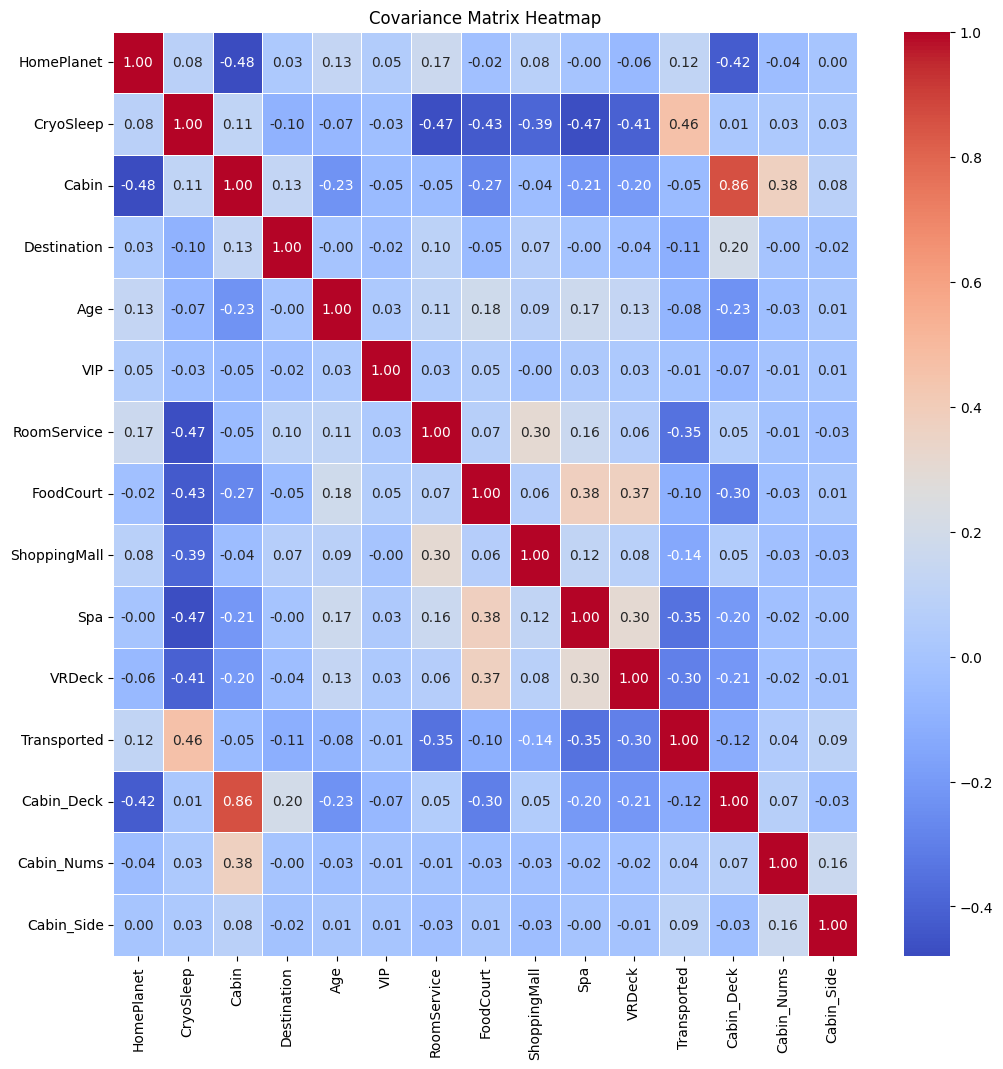

In [67]:
plt.figure(figsize=(12, 12))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

In [68]:
df=df.drop(['Cabin', 'VIP', 'Cabin_Nums'], axis=1)

In [70]:
X_train=df.drop(['Transported'], axis=1)
Y_train=df['Transported']
X_traicn = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [71]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
modelL=LGBMClassifier()
modelL.fit(X_train, Y_train)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(modelL, X_train, Y_train, cv=kf)
print("Accuracy for each fold:", cv_results)
print("Average accuracy across all folds:", cv_results.mean())

[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 56
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 56
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 11
[LightGBM] [Info] [binary:Boos

In [72]:
modelR=LogisticRegression()
modelR.fit(X_train, Y_train)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(modelR, X_train, Y_train, cv=kf)
print("Accuracy for each fold:", cv_results)
print("Average accuracy across all folds:", cv_results.mean())

Accuracy for each fold: [0.76020702 0.76078206 0.7613571  0.7698504  0.78423475]
Average accuracy across all folds: 0.7672862662628351


In [73]:
modelX= XGBClassifier()
modelX.fit(X_train, Y_train)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(modelX, X_train, Y_train, cv=kf)
print("Accuracy for each fold:", cv_results)
print("Average accuracy across all folds:", cv_results.mean())

Accuracy for each fold: [0.76768258 0.76940771 0.79815986 0.77963176 0.79689298]
Average accuracy across all folds: 0.782354976968497


In [74]:
modelG= GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
modelG.fit(X_train, Y_train)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(modelG, X_train, Y_train, cv=kf)
print("Accuracy for each fold:", cv_results)
print("Average accuracy across all folds:", cv_results.mean())

Accuracy for each fold: [0.77343301 0.77803335 0.80391029 0.79689298 0.81530495]
Average accuracy across all folds: 0.7935149163805237
